#Analyse De dataset Temperature change

Les données de changement de température sont stockées dans le dossier "data". Il y a un fichier CSV  contient les colonnes suivantes :

-Code de la région : Le code numérique identifiant une région géographique spécifique.
-Région : Le nom ou la description de la région géographique identifiée par le code de région.
-Code du mois : Le code numérique représentant les mois de l'année.
-Mois : Le nom du mois correspondant au code numérique.
-Code de l'élément : Le code numérique identifiant un type spécifique de données ou d'élément.
-Élément : Le nom ou la description de l'élément identifié par le code élément.
-Unité : L'unité de mesure dans laquelle les données sont exprimées (par exemple, degrés Celsius).
-Y1961 à Y2019 : Les données de changement de température pour chaque année spécifique.

Questions d'analyse :
1. Comment varie la température moyenne globale de 1961 à 2019 ?
2. Y a-t-il des variations importantes ou des anomalies dans le graphique de température mondiale au fil des mois pour les années 1961, 1971, 1981, 1991, 2001 et 2019?
3. Comment varie la température moyenne pour chaque saison au fil des années (1961, 1971, 1981, 1991, 2001, 2019) ?
4. Comment évolue la température moyenne au fil des années pour différentes régions du monde (Afrique, Asie, Europe, Amériques, Australie et Nouvelle-Zélande)? (par continent)
5. Comment varie la température moyenne au fil des années pour les 10 principales régions du monde ayant la somme totale de température la plus élevée?

In [314]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import seaborn as sns
from matplotlib import gridspec



In [315]:
# Lecture d'un fichier CSV dans un DataFrame pandas et L'encodage utilisé est 'latin-1'
data_temp = pd.read_csv("./Data/Environment_Temperature_change_E_All_Data_NOFLAG.csv",encoding='latin-1')

In [316]:
# Affiche les 10 premières lignes du DataFrame data_temp
data_temp.head(10)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
5,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1.512,1.512,1.512,...,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
7,2,Afghanistan,7004,April,6078,Standard Deviation,°C,1.406,1.406,1.406,...,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
9,2,Afghanistan,7005,May,6078,Standard Deviation,°C,1.230,1.230,1.230,...,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230


In [317]:
#describe sur le DataFrame
data_temp.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [318]:
#informations sur le DataFrame
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

## Nettoyage de la data

In [319]:
#Comptage des valeurs nulles par colonne pour (axis=0)
data_temp.isnull().sum(axis=0)

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

In [320]:
#Sélection des lignes avec au moins une valeur nulle pour (axis=1)
rows_with_missing_values = data_temp[data_temp.isnull().any(axis=1)]
rows_with_missing_values


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
102,5,American Samoa,7001,January,7271,Temperature change,°C,0.565,-0.230,-0.066,...,3.010,0.379,0.843,0.534,0.553,0.993,1.863,1.713,0.763,1.513
103,5,American Samoa,7001,January,6078,Standard Deviation,°C,0.429,0.429,0.429,...,0.429,0.429,0.429,0.429,0.429,0.429,0.429,0.429,0.429,0.429
104,5,American Samoa,7002,February,7271,Temperature change,°C,0.261,-0.105,0.132,...,1.015,-0.098,0.702,1.182,1.466,1.526,2.606,0.806,0.956,1.506
105,5,American Samoa,7002,February,6078,Standard Deviation,°C,0.488,0.488,0.488,...,0.488,0.488,0.488,0.488,0.488,0.488,0.488,0.488,0.488,0.488
106,5,American Samoa,7003,March,7271,Temperature change,°C,-0.831,-0.108,0.039,...,1.171,0.620,0.320,1.020,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8869,5301,Central Asia,7018,JunJulAug,6078,Standard Deviation,°C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8870,5301,Central Asia,7019,SepOctNov,7271,Temperature change,°C,NaN,NaN,NaN,...,2.503,0.472,1.332,2.285,-0.703,0.645,-0.698,1.914,0.403,0.337
8871,5301,Central Asia,7019,SepOctNov,6078,Standard Deviation,°C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8872,5301,Central Asia,7020,Meteorological year,7271,Temperature change,°C,NaN,NaN,NaN,...,1.448,0.875,0.975,1.604,0.621,1.552,2.198,1.746,0.882,1.579


In [321]:
#dimensions du DataFrame
data_temp.shape

(9656, 66)

In [322]:
# Suppression des lignes avec des valeurs nulles
data_temp.dropna(inplace=True)

In [323]:
# Vérification des valeurs nulles par colonne dans le DataFrame data_temp
data_temp.isnull().sum(axis=0)

Area Code       0
Area            0
Months Code     0
Months          0
Element Code    0
               ..
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
Length: 66, dtype: int64

In [324]:
# Vérification des valeurs nulles par lignes  dans le DataFrame data_temp
data_temp.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9651    0
9652    0
9653    0
9654    0
9655    0
Length: 6760, dtype: int64

In [325]:
#Re-describe sur le DataFrame 
data_temp.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,...,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000
mean,1086.105917,7009.900296,6674.500000,0.425294,0.333025,0.333066,0.287458,0.240283,0.400098,0.278136,...,0.890067,0.776778,0.792432,0.818339,0.910135,0.995393,1.070360,0.992720,0.991588,1.064171
std,2040.464809,6.051840,596.544125,0.728307,0.746674,0.885451,0.778018,0.766360,0.772728,0.761136,...,0.831028,0.719615,0.781551,0.673643,0.757759,0.795285,0.807636,0.774124,0.818761,0.786634
min,2.000000,7001.000000,6078.000000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.504000,-5.220000,-3.428000,-3.314000,-4.068000,-3.306000,-3.295000,-2.216000,-2.644000
25%,84.000000,7005.000000,6078.000000,0.063000,-0.031000,0.025750,-0.100000,-0.199000,0.067000,-0.172000,...,0.405000,0.372000,0.379000,0.414000,0.430000,0.441750,0.467000,0.448750,0.444000,0.462000
50%,151.000000,7009.000000,6674.500000,0.377000,0.345000,0.367000,0.337000,0.315000,0.372500,0.324000,...,0.783500,0.658000,0.663000,0.724000,0.753500,0.859000,0.948500,0.865000,0.813000,0.932000
75%,234.000000,7016.000000,7271.000000,0.730000,0.682250,0.697000,0.655000,0.634000,0.715500,0.650000,...,1.272000,1.092000,1.104250,1.118000,1.185000,1.361000,1.474000,1.336000,1.311000,1.472250
max,5873.000000,7020.000000,7271.000000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.267000,9.228000,7.215000


In [326]:
# verifer si il ya d'autre valeur nulles 
rows_with_missing_values = data_temp[data_temp.isnull().any(axis=1)]
rows_with_missing_values

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019


In [327]:
data_temp.shape

(6760, 66)

In [328]:
data_temp[data_temp.isnull().any(axis=1)]

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019


In [329]:
# Vérification si toutes les valeurs  sont nulles
data_temp.isnull().any()

Area Code       False
Area            False
Months Code     False
Months          False
Element Code    False
                ...  
Y2015           False
Y2016           False
Y2017           False
Y2018           False
Y2019           False
Length: 66, dtype: bool

In [330]:
# Filtrer les données "changements de température"
Clean_tem_df  = data_temp[data_temp['Element'] == 'Temperature change']

In [331]:
# Supprimer les colonnes inutiles du DataFrame Clean_tem_df

Clean_tem_df.drop(columns=['Area Code', 'Months Code', 'Element Code','Element', 'Unit'], axis=1, inplace=True)
Clean_tem_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_29072\3284093699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_tem_df.drop(columns=['Area Code', 'Months Code', 'Element Code','Element', 'Unit'], axis=1, inplace=True)


,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [332]:
# Obtenir la liste des mois uniques présents dans la colonne 'Months' du DataFrame Clean_tem_df
Clean_tem_df['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

In [333]:
Clean_tem_df = Clean_tem_df[Clean_tem_df['Months'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])]
# Vérifier les mois uniques après le filtrage
Clean_tem_df['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [334]:
Clean_tem_df.columns

Index(['Area', 'Months', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966',
       'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974',
       'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982',
       'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990',
       'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998',
       'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006',
       'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014',
       'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [335]:
# Appliquer l'opération de "melt" pour restructurer le DataFrame
# Les colonnes 'Area' et 'Months' sont conservées comme identifiants, tandis que les autres colonnes sont fondues (melted) en deux nouvelles colonnes : 'years' et 'temperature'

Clean_tem_df = pd.melt(Clean_tem_df, id_vars = ['Area', 'Months'], var_name = 'years', value_name = 'temperature')
Clean_tem_df.head()

,Area,Months,years,temperature
0,Afghanistan,January,Y1961,0.777
1,Afghanistan,February,Y1961,-1.743
2,Afghanistan,March,Y1961,0.516
3,Afghanistan,April,Y1961,-1.709
4,Afghanistan,May,Y1961,1.412


In [336]:
Clean_tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140302 entries, 0 to 140301
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Area         140302 non-null  object 
 1   Months       140302 non-null  object 
 2   years        140302 non-null  object 
 3   temperature  140302 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.3+ MB


In [337]:
# Supprimer le premier caractère de chaque valeur dans la colonne 'years'
Clean_tem_df['years'] = Clean_tem_df['years'].str[1:]
Clean_tem_df.head(100)

,Area,Months,years,temperature
0,Afghanistan,January,1961,0.777
1,Afghanistan,February,1961,-1.743
2,Afghanistan,March,1961,0.516
3,Afghanistan,April,1961,-1.709
4,Afghanistan,May,1961,1.412
...,...,...,...,...
95,Argentina,December,1961,0.172
96,Australia,January,1961,0.287
97,Australia,February,1961,-0.002
98,Australia,March,1961,0.238


In [338]:
Clean_tem_df.shape

(140302, 4)

In [339]:
Clean_tem_df.describe

<bound method NDFrame.describe of                Area     Months years  temperature
0       Afghanistan    January  1961        0.777
1       Afghanistan   February  1961       -1.743
2       Afghanistan      March  1961        0.516
3       Afghanistan      April  1961       -1.709
4       Afghanistan        May  1961        1.412
...             ...        ...   ...          ...
140297         OECD     August  2019        1.034
140298         OECD  September  2019        1.542
140299         OECD    October  2019        1.127
140300         OECD   November  2019        1.030
140301         OECD   December  2019        2.432

[140302 rows x 4 columns]>

## 1. Comment varie la température moyenne globale de 1961 à 2019 ?


In [340]:
Clean_tem_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of',
       'Cocos (Keeling) Islands', 'Colombia', 'Congo', "Côte d'Ivoire",
       'Cuba', 'Cyprus', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'French Southe

In [341]:
#Create a wolrd temperature dataframe
world_df = Clean_tem_df.loc[Clean_tem_df.Area == 'World']
world_df.head(10)


,Area,Months,years,temperature
1946,World,January,1961,0.399
1947,World,February,1961,0.263
1948,World,March,1961,0.254
1949,World,April,1961,0.278
1950,World,May,1961,0.367
1951,World,June,1961,0.313
1952,World,July,1961,0.007
1953,World,August,1961,-0.001
1954,World,September,1961,-0.063
1955,World,October,1961,-0.123


In [342]:
#Grouping by years to get the average of temperature in each year

grp_wolrd_df = world_df.groupby(['years'], as_index = False).mean(numeric_only=['population'])
grp_wolrd_df.head()

,years,temperature
0,1961,0.134583
1,1962,0.061333
2,1963,0.130750
3,1964,-0.287583
4,1965,-0.148167


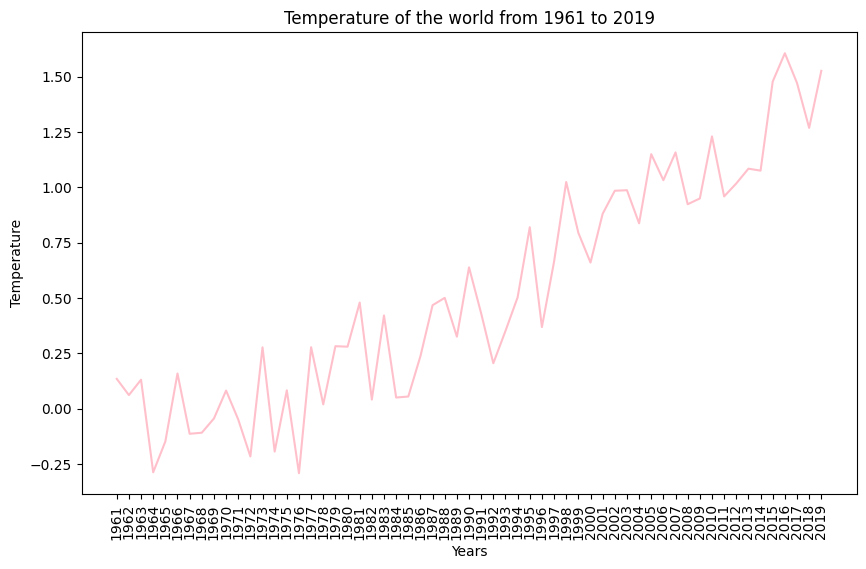

In [343]:
plt.figure(figsize=(10, 6))
plt.plot(grp_wolrd_df['years'], grp_wolrd_df['temperature'], color='pink')
plt.title('Temperature of the world from 1961 to 2019')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

Le graphique montre une augmentation générale de la température mondiale de 1961 à 2019, indiquant une tendance au réchauffement climatique.

## 2. Y a-t-il des variations importantes ou des anomalies dans le graphique de température mondiale au fil des mois pour les années 1961, 1971, 1981, 1991, 2001 et 2019?

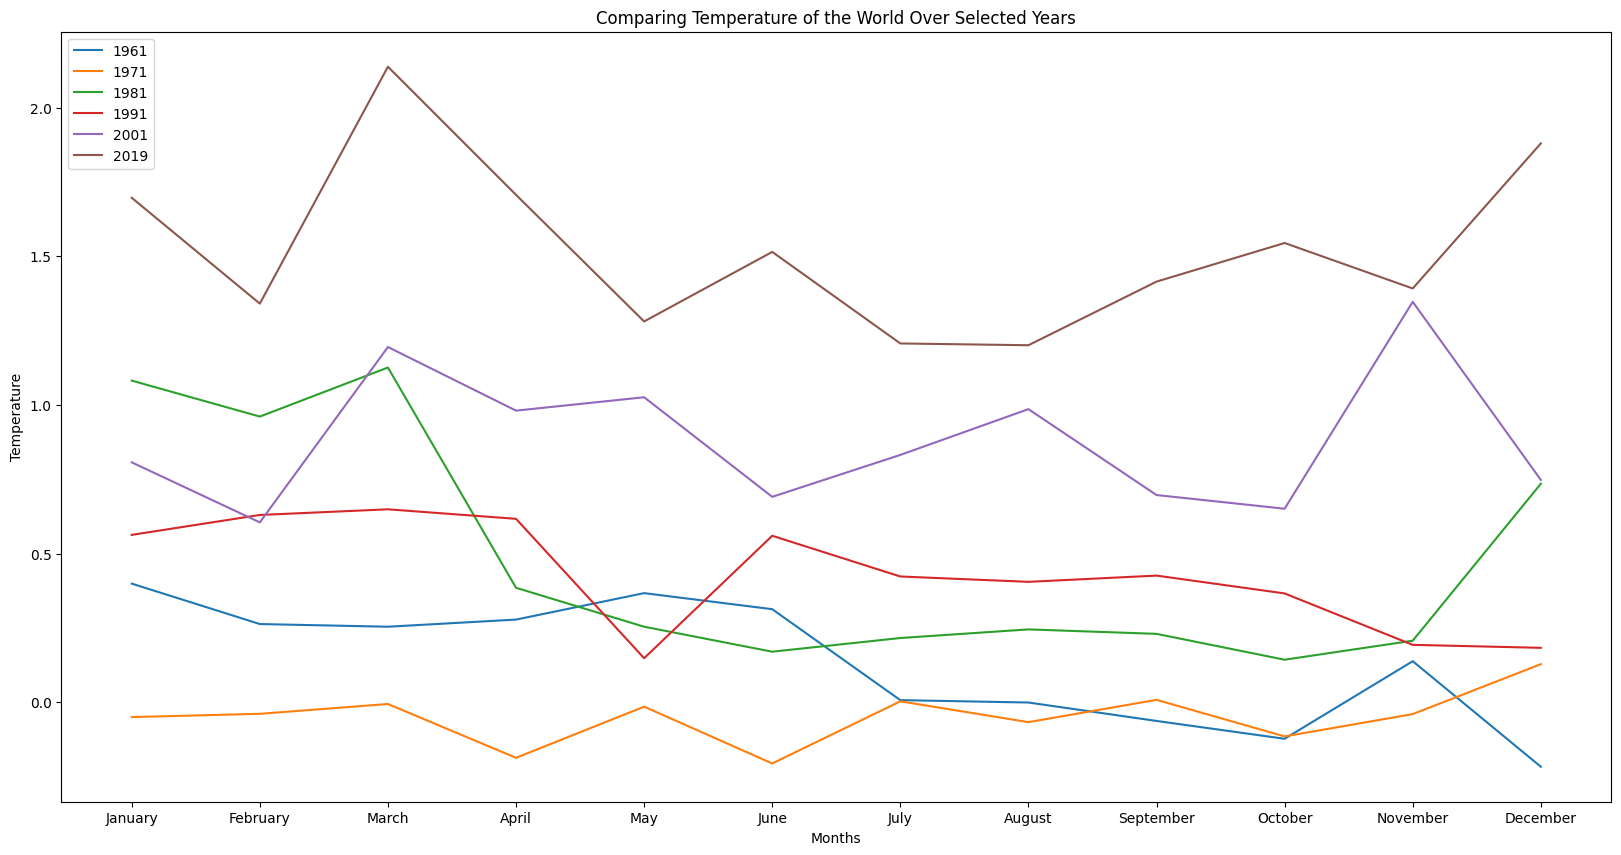

In [344]:

plt.figure(figsize=(20, 10))

# Plot for world data
for year in ['1961', '1971', '1981', '1991', '2001', '2019']:
    year_df = world_df[(world_df['years'] == year)]
    plt.plot(year_df['Months'], year_df['temperature'], label=year)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Comparing Temperature of the World Over Selected Years')

# Display legend
plt.legend()

# Show the plot
plt.show()


## Observation
1. **Augmentation générale de la température** : La température globale semble avoir augmenté au fil des années. C'est évident lorsque l'on compare les lignes de 1961 et 2013, cette dernière étant nettement plus élevée.

2. **Fluctuations saisonnières** : Pour chaque année, il y a des fluctuations de température qui pourraient correspondre à des variations saisonnières. Cela signifie que la température change en fonction des mois de l'année.

3. **Différences entre les années** : Il y a des différences notables dans les températures entre les différentes années. Par exemple, la ligne représentant 2013 est nettement plus élevée que celle de 1961, ce qui indique une augmentation de la température au fil du temps.

Ces observations suggèrent une tendance au réchauffement climatique. Cependant, une analyse plus approfondie serait nécessaire pour comprendre les causes précises de ces changements de température.

## 3. Comment varie la température moyenne pour chaque saison au fil des années (1961, 1971, 1981, 1991, 2001, 2019) ?

C:\Users\user\AppData\Local\Temp\ipykernel_29072\1371984605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df['Season'] = world_df['Months'].map(seasons)


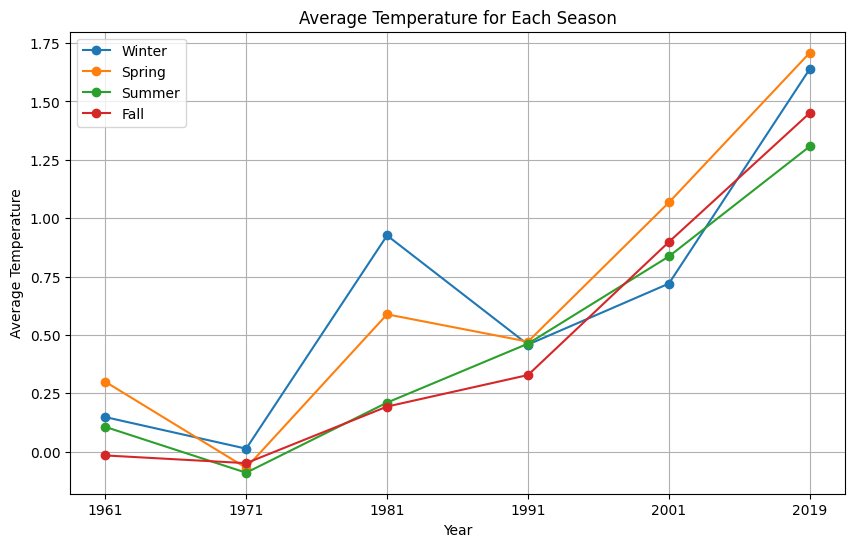

In [345]:


# Assuming world_df is your original DataFrame

# Create a new column for seasons based on the month
seasons = {'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring', 'May': 'Spring', 
           'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Fall', 'October': 'Fall', 
           'November': 'Fall', 'December': 'Winter'}
world_df['Season'] = world_df['Months'].map(seasons)

years_of_interest = ['1961', '1971', '1981', '1991', '2001', '2019']

# Calculate average temperature for each season and year using groupby
season_avg_df = world_df[world_df['years'].isin(years_of_interest)].groupby(['years', 'Season'])['temperature'].mean().reset_index()

season_avg_df = season_avg_df.pivot(index='years', columns='Season', values='temperature').reset_index()
season_avg_df.columns.name = None  # Remove the 'Season' label from the columns

season_avg_df.columns = ['Year', 'Fall', 'Spring', 'Summer', 'Winter']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(season_avg_df['Year'], season_avg_df['Winter'], label='Winter', marker='o')
plt.plot(season_avg_df['Year'], season_avg_df['Spring'], label='Spring', marker='o')
plt.plot(season_avg_df['Year'], season_avg_df['Summer'], label='Summer', marker='o')
plt.plot(season_avg_df['Year'], season_avg_df['Fall'], label='Fall', marker='o')

plt.title('Average Temperature for Each Season')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()


Toutes les saisons montrent une augmentation de la température moyenne au fil des années.

L’hiver a connu une augmentation significative de la température à partir de 1991 environ.

Cela indique une tendance au réchauffement au cours de cette période. C’est une représentation visuelle de l’impact du changement climatique sur les températures saisonnières.

## 4. Comment évolue la température moyenne au fil des années pour différentes régions du monde (Afrique, Asie, Europe, Amériques, Australie et Nouvelle-Zélande)? (par continent)

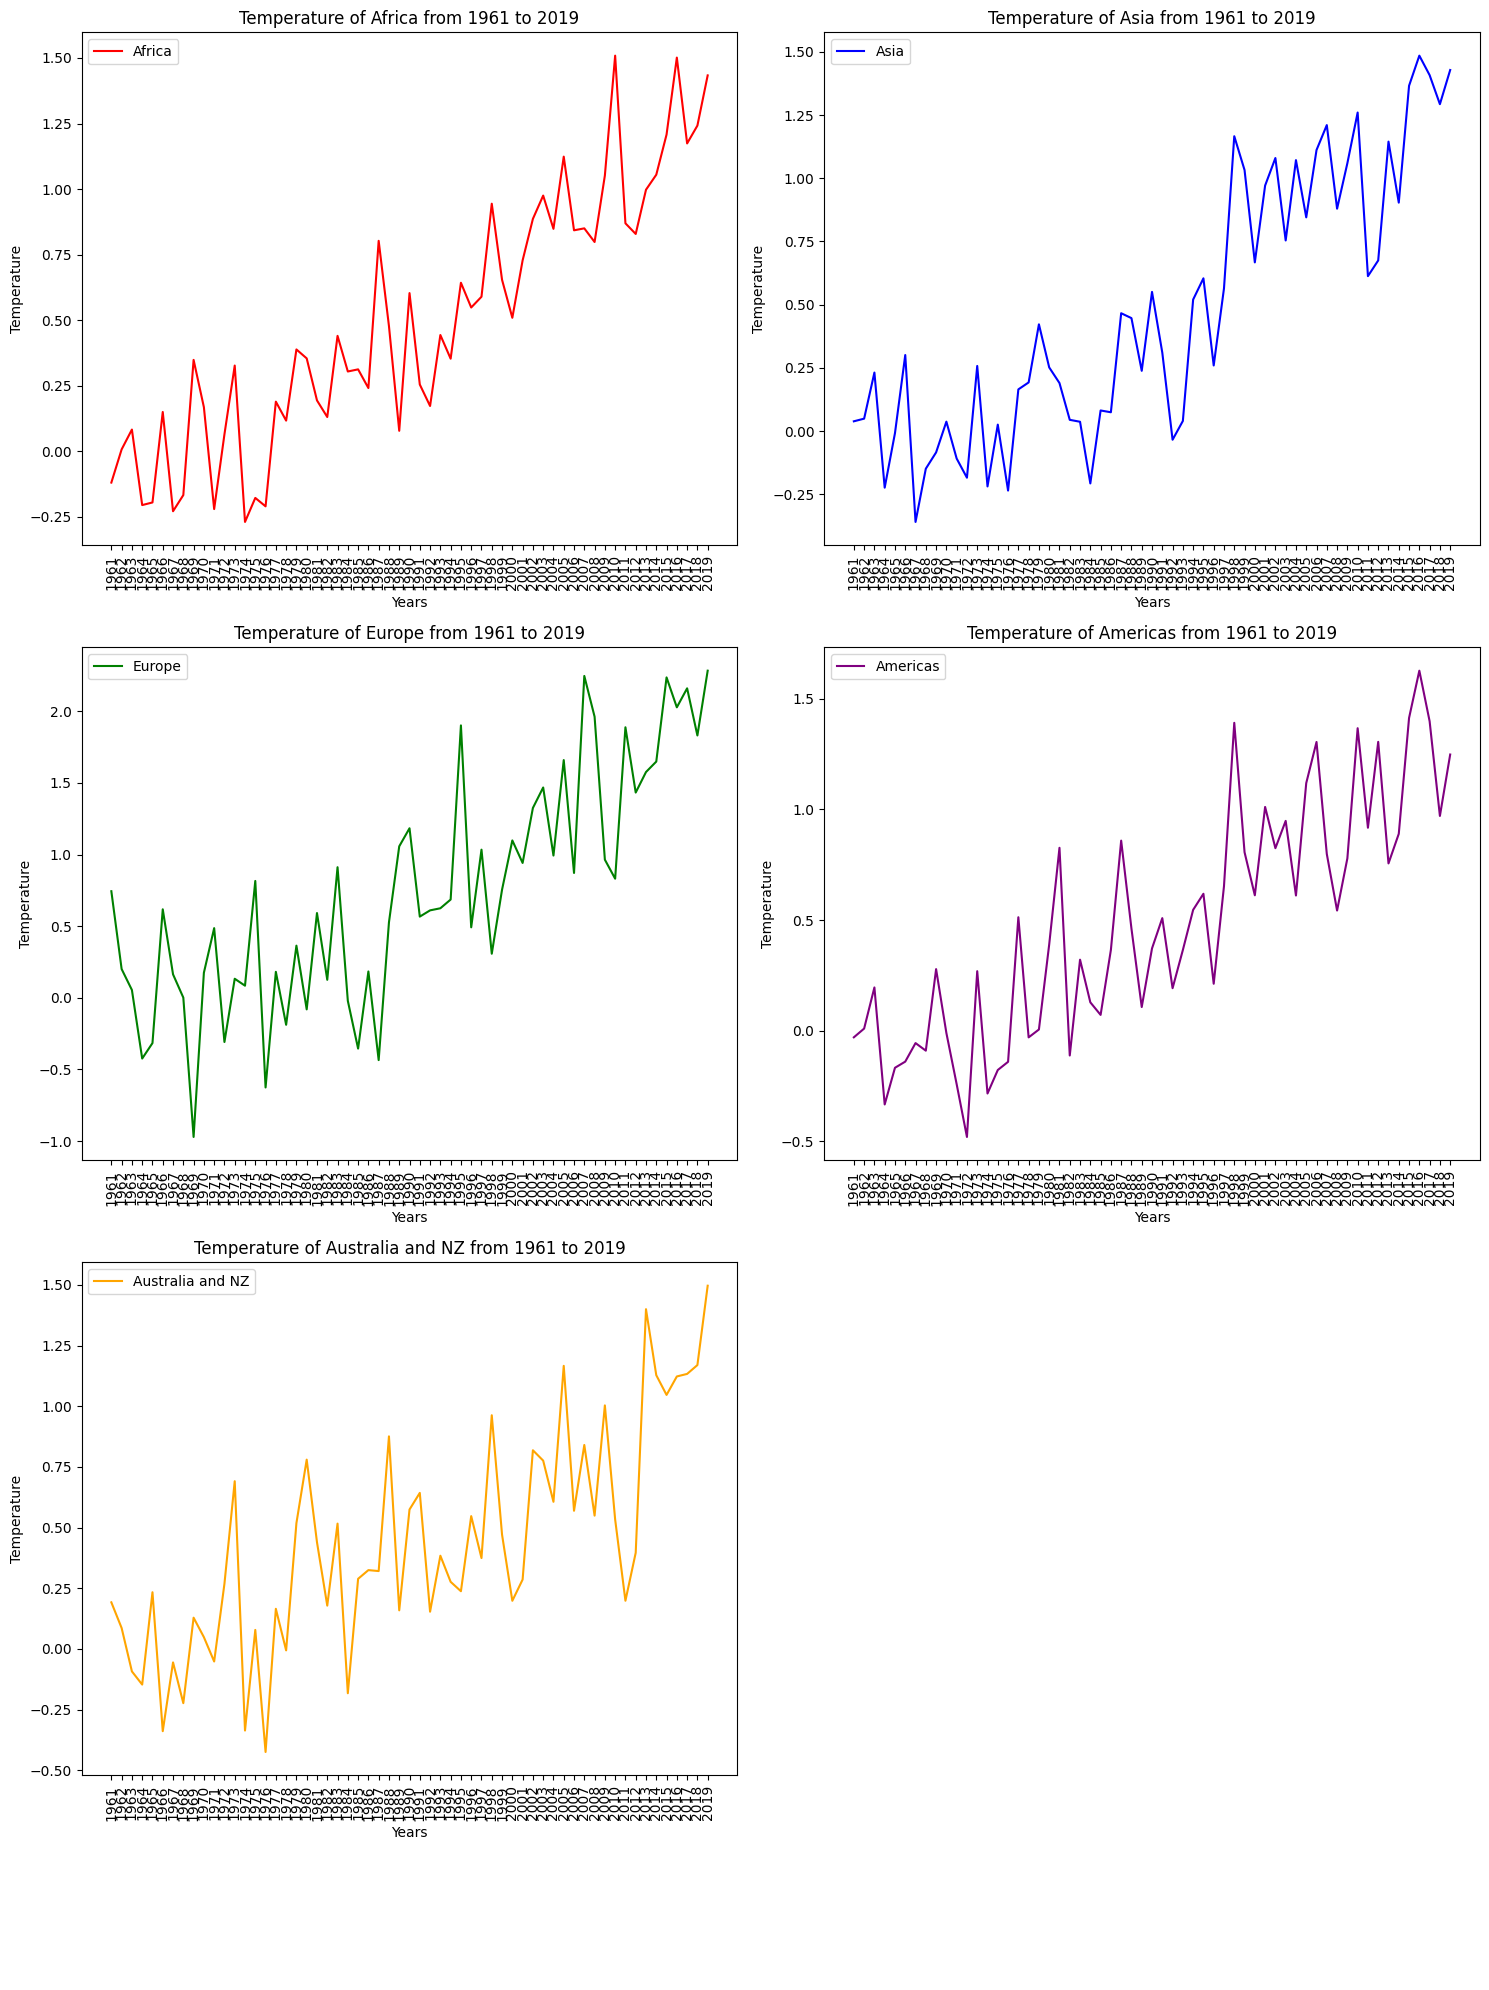

In [346]:


# Create a figure with subplots using gridspec
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 0.2])

# Create subplots
axs = [
    plt.subplot(gs[0, 0]),
    plt.subplot(gs[0, 1]),
    plt.subplot(gs[1, 0]),
    plt.subplot(gs[1, 1]),
    plt.subplot(gs[2, 0]),
]

# Filter data for each continent
africa_df = Clean_tem_df.loc[Clean_tem_df.Area == 'Africa']
asia_df = Clean_tem_df.loc[Clean_tem_df.Area == 'Asia']
europe_df = Clean_tem_df.loc[Clean_tem_df.Area == 'Europe']
americas_df = Clean_tem_df.loc[Clean_tem_df.Area == 'Americas']
australia_df = Clean_tem_df.loc[Clean_tem_df.Area == 'Australia and New Zealand']

# Group by years and calculate the mean for each continent
grp_africa_df = africa_df.groupby(['years'], as_index=False).mean(numeric_only=['temperature'])
grp_asia_df = asia_df.groupby(['years'], as_index=False).mean(numeric_only=['temperature'])
grp_europe_df = europe_df.groupby(['years'], as_index=False).mean(numeric_only=['temperature'])
grp_americas_df = americas_df.groupby(['years'], as_index=False).mean(numeric_only=['temperature'])
grp_australia_df = australia_df.groupby(['years'], as_index=False).mean(numeric_only=['temperature'])

# Plot on each subplot with different colors
axs[0].plot(grp_africa_df['years'], grp_africa_df['temperature'], label='Africa', color='red')
axs[0].set_title('Temperature of Africa from 1961 to 2019')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Temperature')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=90)

axs[1].plot(grp_asia_df['years'], grp_asia_df['temperature'], label='Asia', color='blue')
axs[1].set_title('Temperature of Asia from 1961 to 2019')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Temperature')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=90)

axs[2].plot(grp_europe_df['years'], grp_europe_df['temperature'], label='Europe', color='green')
axs[2].set_title('Temperature of Europe from 1961 to 2019')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Temperature')
axs[2].legend()
axs[2].tick_params(axis='x', rotation=90)

axs[3].plot(grp_americas_df['years'], grp_americas_df['temperature'], label='Americas', color='purple')
axs[3].set_title('Temperature of Americas from 1961 to 2019')
axs[3].set_xlabel('Years')
axs[3].set_ylabel('Temperature')
axs[3].legend()
axs[3].tick_params(axis='x', rotation=90)


axs[4].plot(grp_australia_df['years'], grp_australia_df['temperature'], label='Australia and NZ', color='orange')
axs[4].set_title('Temperature of Australia and NZ from 1961 to 2019')
axs[4].set_xlabel('Years')
axs[4].set_ylabel('Temperature')
axs[4].legend()
axs[4].tick_params(axis='x', rotation=90)
# Remove empty subplot in the last row and column
ax_empty = plt.subplot(gs[3, :])
ax_empty.axis('off')

# Add space for the date labels
plt.subplots_adjust(hspace=0.4)

# Adjust layout
plt.tight_layout()
plt.show()


## 6. Comment varie la température moyenne au fil des années pour les 10 principales régions du monde ayant la somme totale de température la plus élevée   ?

In [347]:


top_10 = Clean_tem_df.groupby('Area').sum().sort_values('temperature', ascending=False)[:10].reset_index()['Area']
top_10     


0                          Mongolia
1    Svalbard and Jan Mayen Islands
2                            Gambia
3                           Morocco
4                     Guinea-Bissau
5                           Tunisia
6                        Mauritania
7                    Eastern Europe
8                           Austria
9                           Senegal
Name: Area, dtype: object

In [348]:
df = Clean_tem_df[Clean_tem_df['Area'].isin(top_10)]
df

,Area,Months,years,temperature
108,Austria,January,1961,-0.801
109,Austria,February,1961,2.903
110,Austria,March,1961,2.721
111,Austria,April,1961,3.571
112,Austria,May,1961,-1.180
...,...,...,...,...
140093,Eastern Europe,August,2019,1.154
140094,Eastern Europe,September,2019,0.911
140095,Eastern Europe,October,2019,2.657
140096,Eastern Europe,November,2019,1.913


In [349]:
# List of areas to include
selected_areas = ['Mongolia', 'Svalbard and Jan Mayen Islands', 'Gambia', 'Morocco', 'Guinea-Bissau',
                  'Tunisia', 'Mauritania', 'Eastern Europe', 'Austria', 'Senegal']

# Filter the DataFrame to include only selected areas
selected_areas_df = Clean_tem_df[Clean_tem_df['Area'].isin(selected_areas)]

# Calculate the mean temperature for each year
grp_selected_areas_df = selected_areas_df.groupby(['years'], as_index=False)['temperature'].mean()

# Display the first few rows of the resulting DataFrame
print(grp_selected_areas_df.head())


  years  temperature
0  1961     0.316858
1  1962    -0.165358
2  1963    -0.130083
3  1964    -0.083983
4  1965    -0.306867


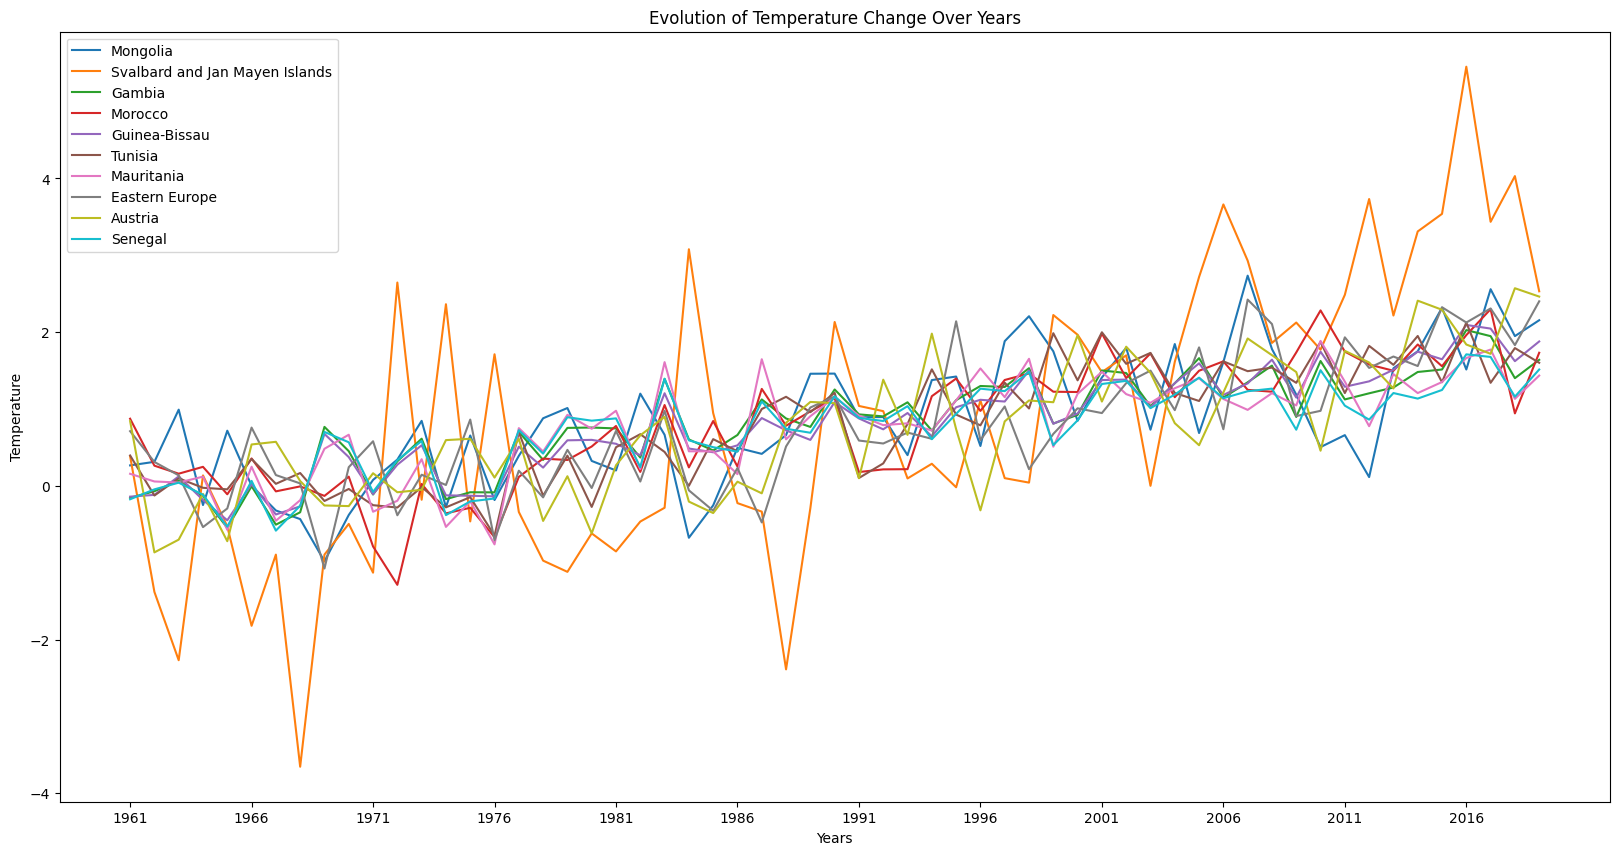

In [350]:
# Assuming 'years' and 'temperature' are the correct column names, adjust if needed
plt.figure(figsize=(20, 10))

# Plot for selected areas
for area in selected_areas:
    area_df = selected_areas_df[selected_areas_df['Area'] == area]
    grp_area_df = area_df.groupby(['years'], as_index=False)['temperature'].mean()
    sns.lineplot(x=grp_area_df['years'], y=grp_area_df['temperature'], label=area)

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Evolution of Temperature Change Over Years')

# Set x-axis ticks every 10 years
plt.xticks(grp_area_df['years'][::5])

# Display legend
plt.legend()

# Show the plot
plt.show()


Chaque ligne sur le graphique fluctue en haut et en bas au fil des ans, indiquant des variations dans les changements de température pour chaque région.

Il n’y a pas de motifs cohérents ; certaines lignes montrent une augmentation générale tandis que d’autres montrent une diminution ou restent relativement stabl